# 神经网络和机器学习之广告预测

案例说明：Advertising（广告预测），使用全连接神经网络层。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

本案例已经提供了训练好的模型，放在`model`文件夹中，文件名称为：`1-model-vv.h5`。如果想直接测试模型，请跳到“导入模型”或者“应用模型”环节，输入数据开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据说明

企业为了提高产品销售额，往往会在各种媒体投入资金展示自己的广告，常见的媒体有电视、广播以及报纸。作为决策者，需要确定在不同媒体的最佳广告投入，以期待最好的产品收益。为了寻求各媒体广告投入与收益之间的关系，还收集到了之前两百个不同产品在各个媒体中的广告投入资金与最终的销售业绩数据，这些数据被制成表格保存在“Advertising.csv”文件中。

数据总共有5列，第1列表示数据的行号，没有列名；第2列到第4列分别是在电视、广播、报纸上的广告投入，最后一列则是对应的销售额。我们让机器学习这一组数据，然后再输入新的数据，让机器来预测可能的销售额。

开始导入数据集吧，数据文件在`data`文件夹中。

`Advertising.csv`文件是以纯文本形式存储表格数据（数字和文本）,文件一共201行，第一行为列名。文本内容如下：

,TV,radio,newspaper,sales

1,230.1,37.8,69.2,22.1

2,44.5,39.3,45.1,10.4

3,17.2,45.9,69.3,9.3

……

In [1]:
import pandas as pd
data=pd.read_csv('./data/Advertising.csv')

用pandas的read_csv功能，读入csv文件中的数据。data是pandas中的DataFrame对象，是一个二维数组。head 和 tail 方法可以分别查看最前面几行和最后面几行的数据（默认为5）。

In [2]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


接下来用pandas的iloc，对数据进行切片。`data.iloc[: , 1:-1]`表示x等于，y=data.iloc[: , -1]

In [4]:
x=data.iloc[: , 1:-1]
y=data.iloc[: , -1]

现在，x与y的形状分别是(200,3)和(200,1)，即x具有200行、3列，y具有200行、1列。其中x是输入的数据(电视、广播、报纸上的广告投入)，y是输出的结果(销售额)。可以输出其中某一行看看。

In [5]:
print(x.values[3])
print(y.values[3])  

[151.5  41.3  58.5]
18.5


In [6]:
data=data.sample(frac=1).reset_index(drop=True)   #打乱数据的先后顺序
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
x_train,y_train=x[:160],y[:160]
x_val,y_val=x[160:180],y[160:180]
x_test,y_test=x[180:],y[180:]

## 3.建立模型

In [7]:
import keras
from keras import layers

Using TensorFlow backend.


为了调用方便，直接导入了keras的layers子集。keras支持建立序惯模型与函数式模型，在一般情况下，建立一个序贯模型就可以了。接着，为模型添加层，keras支持很多类型的神经网络层，这里使用add方法添加2个全连接神经网络层（Dense层）。

第一层通过input_dim参数指定接收输入数据的维度为3（电视、广播、报纸3列），units=32表示将这个3维数据全连接到32个神经元，并通过relu激活函数进行激活，当然，这一层中的神经元个数并不一定需要设置为32个，但是较多的神经元个数使得模型具有更强的拟合能力；从第二层开始，输入数据维度默认为前一层的输出维度，因此不再需要指定输入数据的维度，只需要指定神经元个数即可，在上述代码中，第一层的32维输出再次全连接到第二层的1个神经元中，最后这1个神经元的输出就是模型的预测结果了。

代码如下：

In [8]:
model=keras.models.Sequential()
model.add(layers.Dense(units=32,input_dim=3,activation='relu'))
model.add(layers.Dense(units=1))

定义好模型的层之后，需要对模型进行编译，同时指定训练模型所需要的优化器以及损失的估算方法。在keras中，可以通过optimizer参数来指定优化器。经验证明，adam优化器具有非常良好的表现。loss='mse'表示使用均方误差（mse）作为损失函数。

In [9]:
# 编译模型
model.compile(optimizer='adam',loss='mse')

最后对模型进行训练，一下代码利用现有数据x和y对模型进行训练1000次，epochs表示训练轮次，batch_size表示每次有多少行数据参与训练，最后把整个训练过程记录到history中。程序运行后，在控制台会打印出每轮次的训练情况。

In [10]:
history=model.fit(x_train,y_train,batch_size=80,epochs=1000,validation_data=(x_val,y_val))

Train on 160 samples, validate on 20 samples
Epoch 1/1000
160/160 [==============================] - 1s 8ms/step - loss: 41.7607 - val_loss: 27.4936
Epoch 2/1000
160/160 [==============================] - 0s 178us/step - loss: 23.0322 - val_loss: 14.1658
Epoch 3/1000
160/160 [==============================] - 0s 181us/step - loss: 12.9367 - val_loss: 9.4115
Epoch 4/1000
160/160 [==============================] - 0s 197us/step - loss: 10.2151 - val_loss: 9.8998
Epoch 5/1000
160/160 [==============================] - 0s 178us/step - loss: 11.3267 - val_loss: 11.9077
Epoch 6/1000
160/160 [==============================] - 0s 188us/step - loss: 12.6352 - val_loss: 12.6378
Epoch 7/1000
160/160 [==============================] - 0s 199us/step - loss: 12.4245 - val_loss: 11.3746
Epoch 8/1000
160/160 [==============================] - 0s 221us/step - loss: 10.5695 - val_loss: 9.2587
Epoch 9/1000
160/160 [==============================] - 0s 207us/step - loss: 8.3349 - val_loss: 7.3720
Epoch 10

160/160 [==============================] - 0s 201us/step - loss: 2.5066 - val_loss: 2.7752
Epoch 154/1000
160/160 [==============================] - 0s 187us/step - loss: 2.5024 - val_loss: 2.7727
Epoch 155/1000
160/160 [==============================] - 0s 234us/step - loss: 2.4968 - val_loss: 2.7639
Epoch 156/1000
160/160 [==============================] - 0s 189us/step - loss: 2.4921 - val_loss: 2.7497
Epoch 157/1000
160/160 [==============================] - 0s 198us/step - loss: 2.4878 - val_loss: 2.7449
Epoch 158/1000
160/160 [==============================] - 0s 220us/step - loss: 2.4855 - val_loss: 2.7409
Epoch 159/1000
160/160 [==============================] - 0s 238us/step - loss: 2.4789 - val_loss: 2.7470
Epoch 160/1000
160/160 [==============================] - 0s 203us/step - loss: 2.4746 - val_loss: 2.7541
Epoch 161/1000
160/160 [==============================] - 0s 199us/step - loss: 2.4718 - val_loss: 2.7461
Epoch 162/1000
160/160 [==============================] - 0s 

Epoch 230/1000
160/160 [==============================] - 0s 189us/step - loss: 2.1697 - val_loss: 2.4861
Epoch 231/1000
160/160 [==============================] - 0s 211us/step - loss: 2.1659 - val_loss: 2.4751
Epoch 232/1000
160/160 [==============================] - 0s 198us/step - loss: 2.1638 - val_loss: 2.4834
Epoch 233/1000
160/160 [==============================] - 0s 245us/step - loss: 2.1559 - val_loss: 2.4801
Epoch 234/1000
160/160 [==============================] - 0s 219us/step - loss: 2.1601 - val_loss: 2.4616
Epoch 235/1000
160/160 [==============================] - 0s 218us/step - loss: 2.1478 - val_loss: 2.4658
Epoch 236/1000
160/160 [==============================] - 0s 221us/step - loss: 2.1431 - val_loss: 2.4646
Epoch 237/1000
160/160 [==============================] - 0s 219us/step - loss: 2.1386 - val_loss: 2.4692
Epoch 238/1000
160/160 [==============================] - 0s 234us/step - loss: 2.1399 - val_loss: 2.4570
Epoch 239/1000
160/160 [======================

160/160 [==============================] - 0s 226us/step - loss: 1.8421 - val_loss: 2.2066
Epoch 308/1000
160/160 [==============================] - 0s 227us/step - loss: 1.8412 - val_loss: 2.2200
Epoch 309/1000
160/160 [==============================] - 0s 221us/step - loss: 1.8367 - val_loss: 2.2046
Epoch 310/1000
160/160 [==============================] - 0s 213us/step - loss: 1.8298 - val_loss: 2.1961
Epoch 311/1000
160/160 [==============================] - 0s 227us/step - loss: 1.8254 - val_loss: 2.1897
Epoch 312/1000
160/160 [==============================] - 0s 223us/step - loss: 1.8214 - val_loss: 2.1862
Epoch 313/1000
160/160 [==============================] - 0s 228us/step - loss: 1.8174 - val_loss: 2.1860
Epoch 314/1000
160/160 [==============================] - 0s 247us/step - loss: 1.8143 - val_loss: 2.1784
Epoch 315/1000
160/160 [==============================] - 0s 248us/step - loss: 1.8091 - val_loss: 2.1750
Epoch 316/1000
160/160 [==============================] - 0s 

Epoch 384/1000
160/160 [==============================] - 0s 249us/step - loss: 1.5462 - val_loss: 1.9396
Epoch 385/1000
160/160 [==============================] - 0s 273us/step - loss: 1.5434 - val_loss: 1.9490
Epoch 386/1000
160/160 [==============================] - 0s 275us/step - loss: 1.5376 - val_loss: 1.9438
Epoch 387/1000
160/160 [==============================] - 0s 212us/step - loss: 1.5337 - val_loss: 1.9364
Epoch 388/1000
160/160 [==============================] - 0s 213us/step - loss: 1.5304 - val_loss: 1.9333
Epoch 389/1000
160/160 [==============================] - 0s 206us/step - loss: 1.5270 - val_loss: 1.9242
Epoch 390/1000
160/160 [==============================] - 0s 203us/step - loss: 1.5252 - val_loss: 1.9213
Epoch 391/1000
160/160 [==============================] - 0s 227us/step - loss: 1.5354 - val_loss: 1.9401
Epoch 392/1000
160/160 [==============================] - 0s 191us/step - loss: 1.5196 - val_loss: 1.9241
Epoch 393/1000
160/160 [======================

160/160 [==============================] - 0s 223us/step - loss: 1.0768 - val_loss: 1.4544
Epoch 539/1000
160/160 [==============================] - 0s 244us/step - loss: 1.0708 - val_loss: 1.4561
Epoch 540/1000
160/160 [==============================] - 0s 248us/step - loss: 1.0672 - val_loss: 1.4627
Epoch 541/1000
160/160 [==============================] - 0s 229us/step - loss: 1.0661 - val_loss: 1.4509
Epoch 542/1000
160/160 [==============================] - 0s 260us/step - loss: 1.0614 - val_loss: 1.4448
Epoch 543/1000
160/160 [==============================] - 0s 212us/step - loss: 1.0600 - val_loss: 1.4413
Epoch 544/1000
160/160 [==============================] - 0s 237us/step - loss: 1.0557 - val_loss: 1.4410
Epoch 545/1000
160/160 [==============================] - 0s 262us/step - loss: 1.0542 - val_loss: 1.4416
Epoch 546/1000
160/160 [==============================] - 0s 236us/step - loss: 1.0506 - val_loss: 1.4354
Epoch 547/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 226us/step - loss: 0.7335 - val_loss: 1.0684
Epoch 693/1000
160/160 [==============================] - 0s 248us/step - loss: 0.7359 - val_loss: 1.0637
Epoch 694/1000
160/160 [==============================] - 0s 251us/step - loss: 0.7296 - val_loss: 1.0621
Epoch 695/1000
160/160 [==============================] - 0s 242us/step - loss: 0.7277 - val_loss: 1.0624
Epoch 696/1000
160/160 [==============================] - 0s 251us/step - loss: 0.7300 - val_loss: 1.0573
Epoch 697/1000
160/160 [==============================] - 0s 233us/step - loss: 0.7235 - val_loss: 1.0551
Epoch 698/1000
160/160 [==============================] - 0s 234us/step - loss: 0.7310 - val_loss: 1.0515
Epoch 699/1000
160/160 [==============================] - 0s 253us/step - loss: 0.7200 - val_loss: 1.0465
Epoch 700/1000
160/160 [==============================] - 0s 266us/step - loss: 0.7238 - val_loss: 1.0441
Epoch 701/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 208us/step - loss: 0.5263 - val_loss: 0.7869
Epoch 847/1000
160/160 [==============================] - 0s 222us/step - loss: 0.5147 - val_loss: 0.7823
Epoch 848/1000
160/160 [==============================] - 0s 216us/step - loss: 0.5157 - val_loss: 0.7813
Epoch 849/1000
160/160 [==============================] - 0s 215us/step - loss: 0.5158 - val_loss: 0.7811
Epoch 850/1000
160/160 [==============================] - 0s 191us/step - loss: 0.5207 - val_loss: 0.7826
Epoch 851/1000
160/160 [==============================] - 0s 217us/step - loss: 0.5190 - val_loss: 0.7849
Epoch 852/1000
160/160 [==============================] - 0s 192us/step - loss: 0.5149 - val_loss: 0.7799
Epoch 853/1000
160/160 [==============================] - 0s 206us/step - loss: 0.5096 - val_loss: 0.7780
Epoch 854/1000
160/160 [==============================] - 0s 207us/step - loss: 0.5078 - val_loss: 0.7775
Epoch 855/1000
160/160 [==============================] - 0s 

160/160 [==============================] - 0s 195us/step - loss: 0.4083 - val_loss: 0.6377


从输出的数据可以看出：一开始，loss的值非常大，而随着训练不断的进行，loss在逐渐减小。

将history中的数据通过matplotlib绘图表现出来，能够更加直观地看出loss的变化规律。因为在jupyter上调试，代码中加入%matplotlib inline命令，让图片输出在网页中。下面的图中，将训练过程中的训练集loss以及验证集loss全部输出，并打印出测试集的loss。

20/20 [==============================] - 0s 140us/step
test_loss: 0.423468679189682


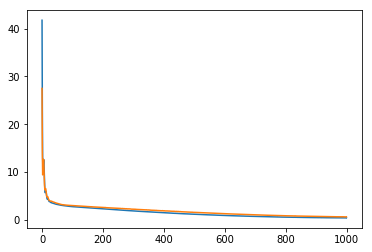

In [11]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(range(1000),history.history['loss'])
plt.plot(range(1000),history.history['val_loss'])
print("test_loss:",model.evaluate(x_test,y_test))

我们如何评价一个模型训练是否成功？首先，训练过程中训练集loss要下降到一个较小的值，表示模型收敛较好，没有欠拟合；其次，测试集loss最后与训练集loss要尽可能相似，差距越小越好小，说明该模型没有过拟合。

当一个神经网络模型成功训练出来后，便可以使用该模型进行预测了。通过pandas的DataFrame方法构造x_input，并使用模型的`predict`方法进行预测。这里的数据是根据`Advertising.csv`的前三条略加修改的，可以看看这个模型输出的结果与真实结果（sales列）是否一致。

In [26]:
#用字典生成的DataFrame，需要指定一下列的次序
d={'TV':[230,44,17],'radio':[37,39,45],'newspaper':[69,45,69]}
x_input=pd.DataFrame(d,columns=['TV','radio','newspaper'])
model.predict(x_input)

array([[21.279892],
       [10.489032],
       [ 9.173268]], dtype=float32)

In [27]:
x_input

,TV,radio,newspaper
0,230,37,69
1,44,39,45
2,17,45,69


用输出来的结果和前三条数据比较（原来数据中的`sales`分别为：22，10，9），看起来效果还是不错的。

## 4.保存模型

训练出来的模型，可以保存。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [14]:
model.save('./model/1-model-vv.h5')   # HDF5文件

## 5.应用模型

使用keras.models的load_model语句载入模型，就可以直接用这个模型来做预测了。

In [15]:
from keras.models import load_model
import pandas as pd
model = load_model('./model/1-model-vv.h5')

这段代码将在`data`文件夹中生成一个名为`test.csv`的文件。

In [20]:
%%writefile ./data/test.csv
TV,radio,newspaper
230.0,37.0,69.0
44,39,45
17,45,69
283.1,42.1,66.1
232.1,8.6,8.7

Overwriting ./data/test.csv


In [23]:
#读取数据，并且输出预测结果
x_input=pd.read_csv('./data/test.csv')
model.predict(x_input)

array([[21.279892],
       [10.489032],
       [ 9.173268],
       [24.312817],
       [13.093816]], dtype=float32)

**注：**可以导入模型后，继续训练，直到loss不会继续变小。